In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# PubChem AID 434939

## Assay info

Name: Counterscreen for activators of the Aryl Hydrocarbon Receptor (AHR): luminescence-based cell-based high throughput screening assay to identify activators of the Pregnane X Receptor (PXR).

Description:


Transcription factors are critical regulators of gene expression (1). Under conditions such as environmental stress and exposure to endogenous toxins, transcription factors can rapidly modulate the transcription of genes whose products regulate cell proliferation and metabolism. The aryl hydrocarbon receptor (AHR) is a ligand-activated transcription factor of the basic helix-loop-helix protein superfamily involved in the biological response to aromatic hydrocarbons, and regulates the expression of xenobiotic-metabolizing enzymes such as cytochrome P450, aldehyde dehydrogenase, quinone reductase, and other phase I and phase II detoxification genes (2, 3). In response to various compounds, including the environmental pollutants dioxins, benzo(a)pyrene, dietary contaminants, grapefruit juice, endogenous toxins, and plant products such as carotinoids, nicotine and caffeine (2, 4-6), cytosolic AHR complexes with chaperones hsp90, p23, and XAP2, translocates to the nucleus where it dimerizes with the AHR nuclear translocator (ARNT) to influence target gene transcription (7, 8). Gain-of-function studies in mice reveal the oncogenic potential of AHR (9), while other reports show roles for AHR in diverse biologic events such as organ development (10, 11), immune function and allergy (12), and estrogen responsiveness (13). The identification of agonists of AHR will provide useful tools to elucidate the roles of this receptor in cell metabolism, transcriptional control, and tumor formation.

## HMO comment

Part of a larger screen for AHR agonists, counterscreen for PXR activity

In [3]:
df = pd.read_csv("PubChem_AID_434939/AID_434939_datatable_all.csv")

In [4]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Activation',
 'Standard Deviation']

In [5]:
# first 3 rows are metadata 
df[0:4]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activation,Standard Deviation
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normalized percent activation of the primary s...,Standard deviation of the confirmation assay d...
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PERCENT,NONE
3,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,NaN


In [6]:
    df = df.drop(labels=list(range(0, 4)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head(10)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activation,Standard Deviation
0,1,4263913.0,2219315.0,CCN1C2=C(C=C(C=C2)NC(=O)CSC3=NN=NN3C4=CC=CC=C4...,Active,100.0,NaN,NaN,1106.85,35.0222
1,2,24828962.0,2091399.0,CC1=CC(=CC=C1)C(=O)N[C@@H](C(C)C)C(=O)NC2=NC=C...,Active,32.0,NaN,NaN,363.7,30.1738
2,3,85146623.0,44142481.0,COC1=CC=CC=C1C2=C(C3=CC4=C(C=C3S2)OCO4)C#CC5(C...,Active,28.0,NaN,NaN,313.94,17.7261
3,4,26725215.0,442142.0,C[C@@H]1C[C@@H]2[C@H]([C@@H]([C@]3([C@H]1C=CC3...,Active,25.0,NaN,NaN,283.4,7.76298
4,5,17414091.0,5350877.0,CC(C)(C)C1=CC=C(C=C1)C2=NNC(=S)N2/N=C/C3=CC=CN3C,Active,23.0,NaN,NaN,260.81,8.77048
5,6,26731782.0,16746003.0,CC(C)N1C=NC2=C(N=C(N=C21)N(CCCO)CCO)NC3=CC(=CC...,Active,23.0,NaN,NaN,255.03,3.73946
6,7,14736275.0,1183863.0,CC1=C(C2=C(O1)C3=CC=CC=C3C(=C2)NS(=O)(=O)C4=CC...,Active,22.0,NaN,NaN,254.57,8.85029
7,8,17412055.0,1490418.0,CN1C2=CC=CC=C2C3=C1SC(=C3)C(=O)NNS(=O)(=O)C4=C...,Active,22.0,NaN,NaN,245.75,30.0861
8,9,24815723.0,16194724.0,CCN(CC)C(=O)CN1C=C(C2=CC=CC=C21)C(=O)C(=O)N3CC...,Active,21.0,NaN,NaN,243.18,31.0912
9,10,22413871.0,1796152.0,CCN1C(=O)/C(=C\C2=C(N(C(=C2)C)CC3=CC=CC=C3)C)/...,Active,20.0,NaN,NaN,229.62,22.6068


In [8]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Activation', 'Standard Deviation'],
      dtype='object')

In [9]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

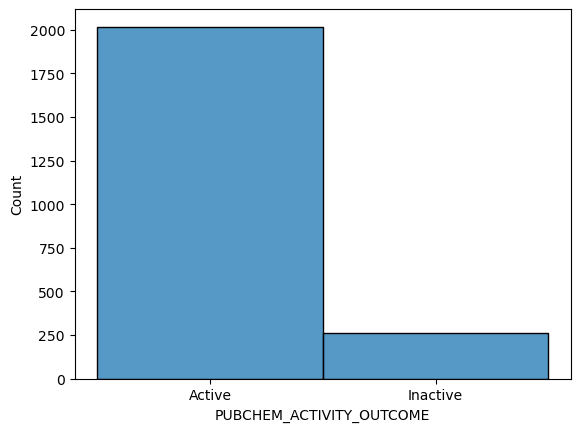

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

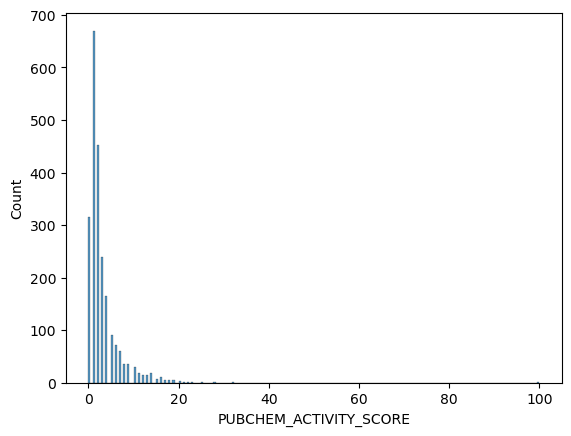

In [11]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

In [12]:
import matplotlib.pyplot as plt

In [13]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [14]:
len(df)

2281

In [15]:
len(df)

2281

In [16]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [17]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [18]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df[mol_col].progress_apply(lambda x: standardize_smiles(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2281/2281 [00:11<00:00, 202.28it/s]


In [19]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [20]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2281/2281 [00:00<00:00, 3947.02it/s]


In [21]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

np.int64(0)

In [22]:
df.dropna(subset="INCHIKEY")

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activation,Standard Deviation,CANONICAL_SMILES,INCHIKEY
0,1,4263913.0,2219315.0,CCN1C2=C(C=C(C=C2)NC(=O)CSC3=NN=NN3C4=CC=CC=C4...,Active,100.0,NaN,NaN,1106.85,35.0222,CCn1c2ccccc2c2cc(NC(=O)CSc3nnnn3-c3ccccc3)ccc21,PKWBGMCLPVXLSO-UHFFFAOYSA-N
1,2,24828962.0,2091399.0,CC1=CC(=CC=C1)C(=O)N[C@@H](C(C)C)C(=O)NC2=NC=C...,Active,32.0,NaN,NaN,363.7,30.1738,Cc1cccc(C(=O)NC(C(=O)Nc2ncc(C)s2)C(C)C)c1,ASGCTENTJVTZBM-UHFFFAOYSA-N
2,3,85146623.0,44142481.0,COC1=CC=CC=C1C2=C(C3=CC4=C(C=C3S2)OCO4)C#CC5(C...,Active,28.0,NaN,NaN,313.94,17.7261,COc1ccccc1-c1sc2cc3c(cc2c1C#CC1(O)CCCCC1)OCO3,KAIBRZZQPOEOOJ-UHFFFAOYSA-N
3,4,26725215.0,442142.0,C[C@@H]1C[C@@H]2[C@H]([C@@H]([C@]3([C@H]1C=CC3...,Active,25.0,NaN,NaN,283.4,7.76298,C=C1C(=O)O[C@@H]2C[C@@H](C)C3=CCC(=O)[C@@]3(C)...,YUHGCHCTADWTAC-LAIRZBGTSA-N
4,5,17414091.0,5350877.0,CC(C)(C)C1=CC=C(C=C1)C2=NNC(=S)N2/N=C/C3=CC=CN3C,Active,23.0,NaN,NaN,260.81,8.77048,Cn1cccc1/C=N/n1c(-c2ccc(C(C)(C)C)cc2)n[nH]c1=S,GGKUFTYXGKDNBZ-XDHOZWIPSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...
2276,2277,24810128.0,1086050.0,CN1CCN(CC1)C2=CC=C(C=C2)NC(=O)C3=C(C4=CC=CC=C4...,Inactive,0.0,NaN,NaN,-5.71,0.223385,CN1CCN(c2ccc(NC(=O)c3sc4ccccc4c3Cl)cc2)CC1,PQXJTUXHWHJQBX-UHFFFAOYSA-N
2277,2278,22401580.0,7110104.0,C1COC2=C(O1)C=C3C(=C2)SC(=N3)NC4=NC5=C(S4)C=C(...,Inactive,0.0,NaN,NaN,-6.33,0.508187,Fc1ccc2nc(Nc3nc4cc5c(cc4s3)OCCO5)sc2c1,QSOMZIBTZRYYGF-UHFFFAOYSA-N
2278,2279,26659646.0,375895.0,COC1=C2C(=C(C=C1)OC)C(=O)C(=C(C2=O)Cl)Cl,Inactive,0.0,NaN,NaN,-7.22,0.850409,COc1ccc(OC)c2c1C(=O)C(Cl)=C(Cl)C2=O,DRGCWMGLVXZPIZ-UHFFFAOYSA-N
2279,2280,24825966.0,5335051.0,C1OC2=C(O1)C=C(C=C2)/C=N/NC3=NC4=CC=CC=C4C=C3,Inactive,0.0,NaN,NaN,-10.47,0.873577,C(=N/Nc1ccc2ccccc2n1)\c1ccc2c(c1)OCO2,MZMSTCBULXIQJK-VCHYOVAHSA-N


In [23]:
# lets gather up the activities?

In [24]:
# ok, clean up DF, and segement into active and inactives,

In [25]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [26]:
clean = df[keep_cols]

In [27]:
clean["dataset"] = "aid434939"
clean["data_type"] = "assay"

/tmp/ipykernel_46369/2167253045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["dataset"] = "aid434939"
/tmp/ipykernel_46369/2167253045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["data_type"] = "assay"


In [28]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

/tmp/ipykernel_46369/212178452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"


In [29]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

MolGridWidget()

In [30]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "agonist"

/tmp/ipykernel_46369/1447994237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["common_name"] = pd.NA
/tmp/ipykernel_46369/1447994237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["action_type"] = "agonist"


In [31]:
clean.to_csv("./processed/AID_434939.csv", index=False)

In [32]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok